# Проект: обзор бизнес-показателей маркетплейса

Выполнил: Завьялов Иван Викторович 

Дата: 14.01.2026

## Описание данных

### Таблица `Users`

| Поле              | Описание                                       |
|-------------------|------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.         |
| `registration_date` | Дата регистрации пользователя.                |
| `age`             | Возраст пользователя.                          |
| `gender`          | Пол.                                |
| `region`          | Регион.                                        |
| `acq_channel`     | Канал привлечения.                             |
| `buyer_segment`   | Сегмент покупателя.                            |
| `cohort_week`     | Неделя привлечения.|
| `cohort_month`    | Месяц привлечения. |

---

### Таблица `Events`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `event_id`    | Уникальный идентификатор события.                                        |
| `user_id`     | Идентификатор пользователя.                                              |
| `event_date`  | Дата события.                                                            |
| `event_type`  | Тип события.   |
| `os`          | Операционная система.               |
| `device`      | Тип устройства.                                |
| `product_name`| Наименование товара, к которому относится событие (если применимо).      |
| `event_week`  | Неделя события.                                          |
| `event_month` | Месяц события .                                           |

---

### Таблица `Orders`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `order_id`    | Уникальный идентификатор заказа.                                         |
| `user_id`     | Идентификатор пользователя, который сделал заказ |
| `order_date`  | Дата и время оформления заказа.                                          |
| `product_name`| Наименование товара.                                                     |
| `quantity`    | Количество единиц товара в заказе.                                       |
| `unit_price`  | Цена за одну единицу товара.                                             |
| `total_price` | Итоговая сумма заказа.                                                   |
| `category_name` | Наименование категории товара.                                         |
| `order_week`  | Неделя заказа.                                           |
| `order_month` | Месяц заказа.                                            |


### Таблица `Campaign_costs`

| Поле         | Описание                                                                 |
|--------------|--------------------------------------------------------------------------|
| `acq_channel`| Канал привлечения.  |
| `spend_month`| Месяц, в который был потрачен бюджет (отражает период, в котором были привлечены пользователи)                      |
| `budget`     | Маркетинговый бюджет (в денежном выражении), потраченный на данный канал в указанном месяце.                           |



## Описание событий из таблицы events

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |

## План проекта

 1. Загрузка и предобработка данных.
 2. Обзор ключевых метрик.
 3. Оценка метрик монетизации и юнит-экономики.
 4. Поиск инсайтов и точек роста. Сегментация и формулирование гипотез.
 5. Подготовка эксперимента и подведение его итогов.

### Загрузка и предобработка данных

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [2]:
# Загружаем данные для анализа
orders = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_orders.csv',parse_dates=['order_date', 'order_week','order_month'])
campaign_costs = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_campaign_costs.csv',parse_dates=['spend_month'],index_col=0)
users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_users.csv',parse_dates=['registration_date', 'cohort_week','cohort_month'])
events = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_events.csv',parse_dates=['event_date', 'event_week','event_month'])

In [3]:
# Выведем общую инфолрмацию о загруженных данных
display(orders.info())
display(campaign_costs.info())
display(users.info())
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       31357 non-null  int64         
 1   user_id        31357 non-null  int64         
 2   order_date     31357 non-null  datetime64[ns]
 3   product_name   31357 non-null  object        
 4   quantity       31357 non-null  int64         
 5   unit_price     31357 non-null  float64       
 6   total_price    31357 non-null  float64       
 7   category_name  31357 non-null  object        
 8   order_week     31357 non-null  datetime64[ns]
 9   order_month    31357 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 2.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   acq_channel  88 non-null     object        
 1   spend_month  88 non-null     datetime64[ns]
 2   budget       88 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            44151 non-null  int64         
 1   registration_date  44151 non-null  datetime64[ns]
 2   age                44151 non-null  int64         
 3   gender             44151 non-null  object        
 4   region             44151 non-null  object        
 5   acq_channel        44151 non-null  object        
 6   buyer_segment      44151 non-null  object        
 7   cohort_week        44151 non-null  datetime64[ns]
 8   cohort_month       44151 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 3.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      785859 non-null  int64         
 1   user_id       785859 non-null  int64         
 2   event_date    785859 non-null  datetime64[ns]
 3   event_type    785859 non-null  object        
 4   os            785859 non-null  object        
 5   device        785859 non-null  object        
 6   product_name  385740 non-null  object        
 7   event_week    785859 non-null  datetime64[ns]
 8   event_month   785859 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 54.0+ MB


##### Данные соответствуют своему описанию. Столбцы имеют корректный тип данных. Пропуски есть только в таблице events, что связано с особенностями данных. Пропуски оставляем как есть.

In [4]:
# Выведем первые пять строк каждой таблицы
display(orders.head())
display(campaign_costs.head())
display(users.head())
events.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01


,acq_channel,spend_month,budget
Unnamed: 0,,,
0,Affiliate,2024-01-01,179343.3875
1,Affiliate,2024-02-01,175488.4875
2,Affiliate,2024-03-01,164543.4750
3,Affiliate,2024-04-01,186869.9750
4,Affiliate,2024-05-01,166443.7750


,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,1,2024-01-01 00:47:00,35,M,Москва,Google Ads,regular,2024-01-01,2024-01-01
1,2,2024-01-01 19:01:00,53,M,Москва,Email Marketing,rare,2024-01-01,2024-01-01
2,3,2024-01-01 04:13:00,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01
3,4,2024-01-01 17:18:00,58,M,Краснодар,Affiliate,one_time,2024-01-01,2024-01-01
4,5,2024-01-01 08:29:00,58,F,Другие регионы,Google Ads,regular,2024-01-01,2024-01-01


,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


In [5]:
# Проверим данные на полные дубликаты
display(f' Число полных дубликатов в таблице orders: {orders.duplicated().sum()} ')
display(f' Число полных дубликатов в таблице campaign_costs: {campaign_costs.duplicated().sum()} ')
display(f' Число полных дубликатов в таблице users: {users.duplicated().sum()} ')
f' Число полных дубликатов в таблице events: {events.duplicated().sum()} '

' Число полных дубликатов в таблице orders: 0 '

' Число полных дубликатов в таблице campaign_costs: 0 '

' Число полных дубликатов в таблице users: 0 '

' Число полных дубликатов в таблице events: 0 '

##### Полных дубликатов в данных не обнаружено

In [6]:
# Выведем список пользовательских событий
events['event_type'].unique()

array(['page_view', 'product_view', 'product_click', 'add_to_cart',
       'checkout_start', 'checkout_complete', 'user_logout', 'search',
       'category_view', 'filter_apply', 'promo_view', 'wishlist_add',
       'user_login', 'banner_click', 'remove_from_cart'], dtype=object)

### Обзор ключевых метрик

##### Выручка маркетплейса составляет 5% от общей суммы заказа. Добавим поле со значением выручки маркетплейса в таблицу orders

In [7]:
orders['revenue']=orders['total_price']*0.05
orders.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month,revenue
0,1,3,2024-01-19 01:52:52,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,553.9130
1,2,3,2024-01-19 01:52:52,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,567.0190
2,3,3,2024-01-19 01:52:52,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,1089.2090
3,4,3,2024-01-25 13:59:38,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01,553.9130
4,5,3,2024-01-25 13:59:38,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01,104.9795


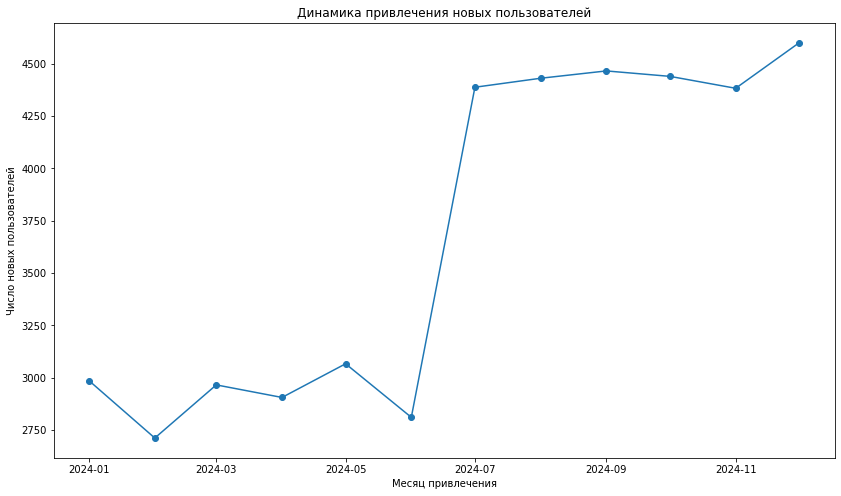

In [8]:
# Визуализируем динамику привлечения новых пользователей
df=users.groupby('cohort_month')['user_id'].nunique().reset_index()

plt.figure(figsize=(14,8))

plt.plot(df['cohort_month'],df['user_id'],marker='o')

plt.title('Динамика привлечения новых пользователей')

plt.xlabel('Месяц привлечения')
plt.ylabel('Число новых пользователей')
plt.show()


##### Начиная с июля месяца сильно выросло число привлекаемых каждый месяц новых пользователей

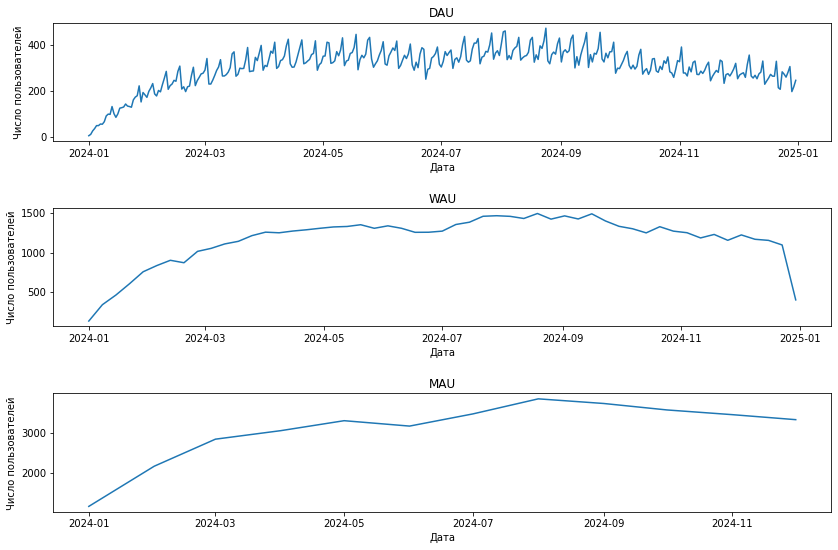

In [9]:
# Посмотрим динамику активности пользователей в разрезе дня, недели и месяца по таблице events
day_active_users=events.groupby('event_date')['user_id'].nunique().reset_index()
week_active_users=events.groupby('event_week')['user_id'].nunique().reset_index()
month_active_users=events.groupby('event_month')['user_id'].nunique().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(
    day_active_users['event_date'], 
    day_active_users['user_id'])
axes[0].set_title('DAU')
axes[0].set_ylabel('Число пользователей')
axes[0].set_xlabel('Дата')

axes[1].plot(
    week_active_users['event_week'], 
    week_active_users['user_id'])
axes[1].set_title('WAU')
axes[1].set_ylabel('Число пользователей')
axes[1].set_xlabel('Дата')

axes[2].plot(
    month_active_users['event_month'], 
    month_active_users['user_id'])
axes[2].set_title('MAU')
axes[2].set_ylabel('Число пользователей')
axes[2].set_xlabel('Дата')

plt.tight_layout(pad=2.0)
plt.show()

##### Все три метрики вовлечённости пользователей растут до сентября месяца, после чего начинает проявляться небольшая негативная динамика.

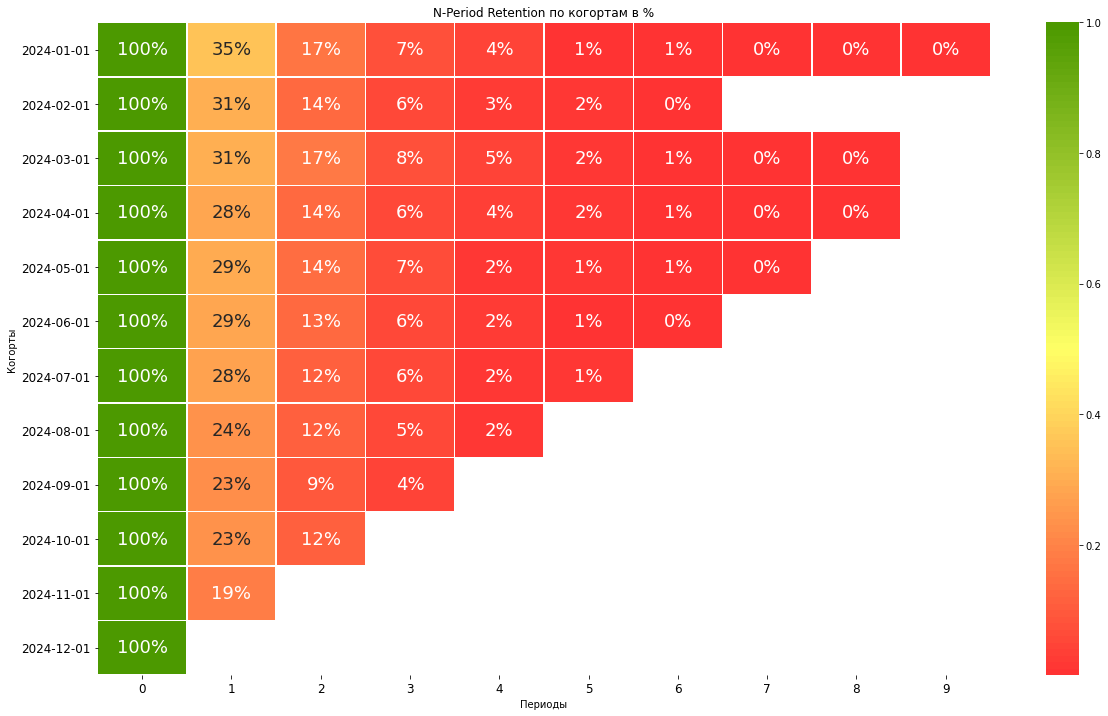

In [10]:
# Расчитаем Retention пользователей по таблице orders
first_month=orders.groupby('user_id')['order_month'].min().reset_index()
first_month=first_month.rename(columns={'order_month':'first_order_month'})
orders=pd.merge(orders,first_month,on='user_id',how='left')
data=orders
data['n_period'] = (
    data['order_month'].dt.to_period('M').astype('int64')
    - data['first_order_month'].dt.to_period('M').astype('int64')
)

data_pivot = pd.pivot_table(data,
                            values='user_id',
                            index='first_order_month',
                            columns='n_period',
                            aggfunc=pd.Series.nunique).fillna(0).astype(int)


data_pivot.replace(0, '', inplace=True)

data_pivot = data_pivot.replace('', 0).astype('int')


data_pivot = data_pivot.div(data_pivot[0], axis=0)

data_pivot[data_pivot == 0] = float('nan')

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100) 


data_pivot.index = pd.to_datetime(data_pivot.index).strftime('%Y-%m-%d')

plt.subplots(figsize=(20,12))
sns.heatmap(data_pivot,
           cmap=cmap,
           annot=True,
           fmt='.0%',
           linewidth=0.5,
           annot_kws={"size": 18})


plt.title('N-Period Retention по когортам в %')
plt.xlabel('Периоды')
plt.ylabel('Когорты')
plt.yticks(rotation=0)
plt.tick_params(labelsize=12) 
plt.show()

##### Заметно ухудшение Retention когорт начиная с августа месяца

##### Для построения метрик CR в заказ и воронки событий добавим событие с фактом оплаты покупки, используя таблицу orders

In [11]:
# Добавляем событие purchase в таблицу events
purchase_events = pd.DataFrame({
    'user_id': orders['user_id'],
    'event_date': orders['order_date'],
    'event_type': 'purchase',
    'product_name': orders['product_name'],
    'event_id': pd.NA,  
    'os': pd.NA,
    'device': pd.NA
})


purchase_events['event_week'] = orders['order_date'].dt.isocalendar().week
purchase_events['event_month'] = orders['order_date'].dt.to_period('M')


all_events = pd.concat([
    events.astype({'event_date': 'datetime64[ns]'}), 
    purchase_events
], ignore_index=True, copy=False) 


all_events.sort_values(
    ['user_id', 'event_date'], 
    inplace=True, 
    ignore_index=True
)

In [12]:
# Рассчитаем и визуализируем классическую и пошаговую воронки событий
funnel_steps=['page_view','product_view','product_click','add_to_cart','checkout_start','checkout_complete','purchase']

funnel_df_steps = all_events[all_events['event_type'].isin(funnel_steps)]

funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = (funnel_df['users'] / funnel_df['users'].iloc[0] * 100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users'] / funnel_df['users'].shift(1) * 100).round(1)

funnel_df

,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,22098,100.0,NaN
1,product_view,22069,99.9,99.9
2,product_click,21745,98.4,98.5
3,add_to_cart,20411,92.4,93.9
4,checkout_start,16769,75.9,82.2
5,checkout_complete,13897,62.9,82.9
6,purchase,8922,40.4,64.2


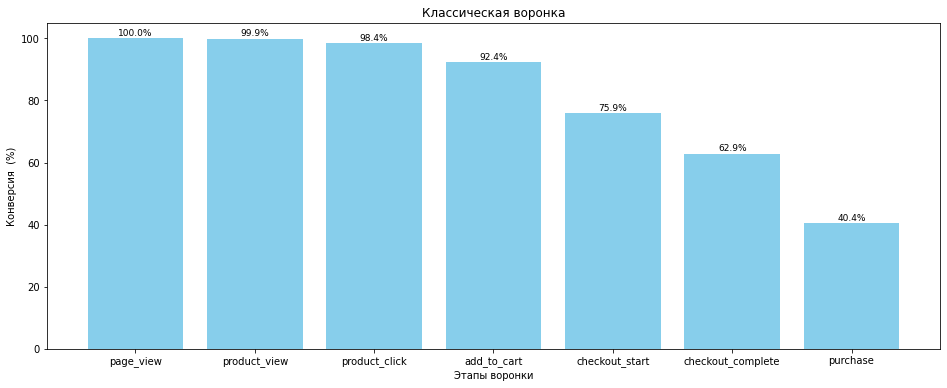

In [13]:
# Визуализируем данные классической воронки по всем пользователям
plt.figure(figsize=(16, 6))

bars = plt.bar(funnel_df['step'], funnel_df['conversion_from_first_%'], color='skyblue')

# Добавляем подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.2,                        
        f'{height:.1f}%',                    
        ha='center',                        
        va='bottom',                      
        fontsize=9,                       
        color='black',                    
        fontweight='normal'               
    )

plt.title('Классическая воронка')
plt.ylabel('Конверсия  (%)')
plt.xlabel('Этапы воронки')
plt.show()

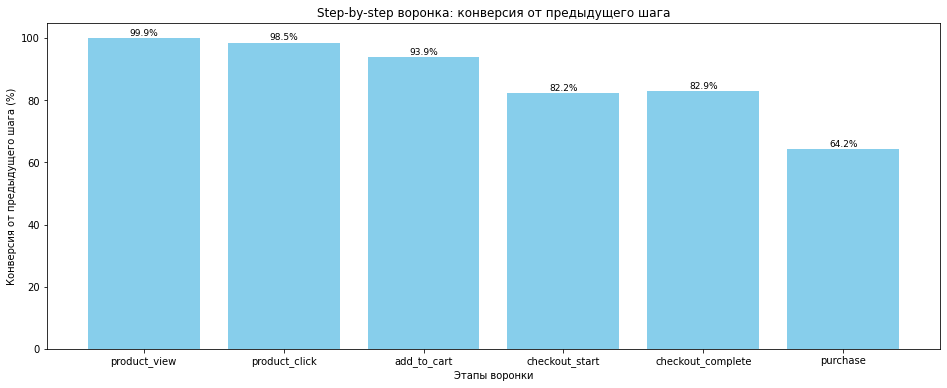

In [14]:
# Визуализируем данные воронки step-by-step, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(16, 6))
# Строим barplot
bars=plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color='skyblue')

# Добавляем подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.2,                        
        f'{height:.1f}%',                    
        ha='center',                        
        va='bottom',                      
        fontsize=9,                       
        color='black',                    
        fontweight='normal'               
    )

    
plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

##### На этапах воронки заметна сильная просадка на шаге оплаты покупки после завершения заказа. 35% пользователей завершивших заказ не производят оплату.

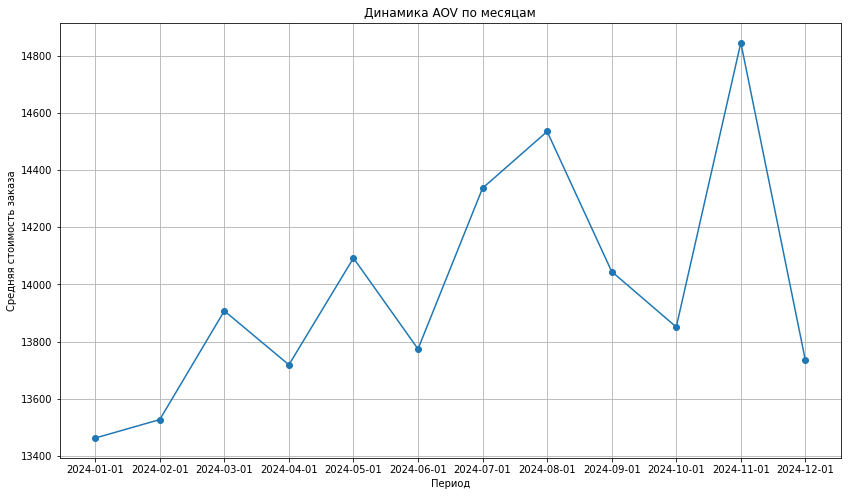

In [15]:
# Рассчитаем и визуализируем в динамике метрику AOV по таблице с заказами (месячная динамика)
aov_by_month = orders.groupby('order_month').agg({
    'total_price': 'sum',
    'order_id': 'nunique'
}).reset_index()
aov_by_month['AOV'] = aov_by_month['total_price'] / aov_by_month['order_id']

plt.figure(figsize=(14,8))
plt.plot(aov_by_month['order_month'].astype(str), aov_by_month['AOV'], marker='o')
plt.title('Динамика AOV по месяцам')
plt.ylabel('Средняя стоимость заказа')
plt.xlabel('Период')
plt.grid(True)
plt.show()

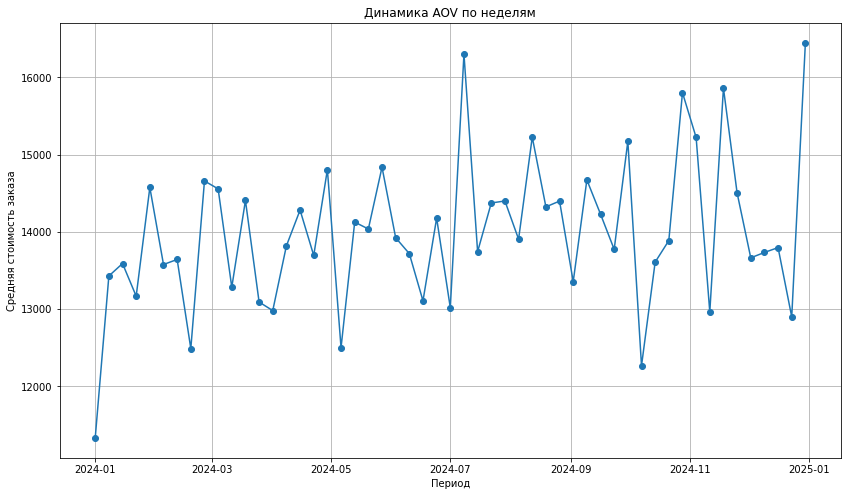

In [16]:
# Рассчитаем и визуализируем в динамике метрику AOV по таблице с заказами(недельная динамика)
aov_by_week = orders.groupby('order_week').agg({
    'total_price': 'sum',
    'order_id': 'nunique'
}).reset_index()
aov_by_week['AOV'] = aov_by_week['total_price'] / aov_by_week['order_id']

plt.figure(figsize=(14,8))
plt.plot(aov_by_week['order_week'], aov_by_week['AOV'], marker='o')
plt.title('Динамика AOV по неделям')
plt.ylabel('Средняя стоимость заказа')
plt.xlabel('Период')
plt.grid(True)
plt.show()

##### Негативной динамики по средней стоимости заказа не наблюдается

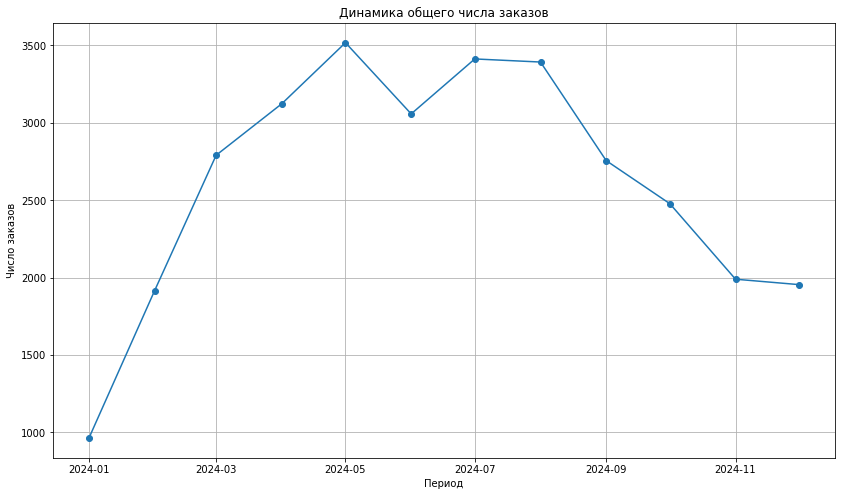

In [17]:
# Рассчитаем и визуализируем динамику общего числа заказов
orders_df=orders.groupby('order_month')['order_id'].nunique().reset_index()

plt.figure(figsize=(14,8))

plt.plot(orders_df['order_month'], orders_df['order_id'], marker='o')
plt.title('Динамика общего числа заказов')
plt.ylabel('Число заказов')
plt.xlabel('Период')
plt.grid(True)
plt.show()

#### Выводы после обзора ключевых метрик: с июля месяца сильно выросло число новых пользователей,ежемесячно привлекаемых в продукт. В то же время с августа заметно снижение метрик DAU,WAU и MAU, ухудшение показателя Retention пользователей. С сентября также видно снижение общего числа заказов. Негативной динамики по среднему чеку не выявлено. На этапах воронки заметна сильная просадка на шаге оплаты покупки после завершения заказа. 35% пользователей завершивших заказ не производят оплату.

### Оценка метрик монетизации и юнит-экономики

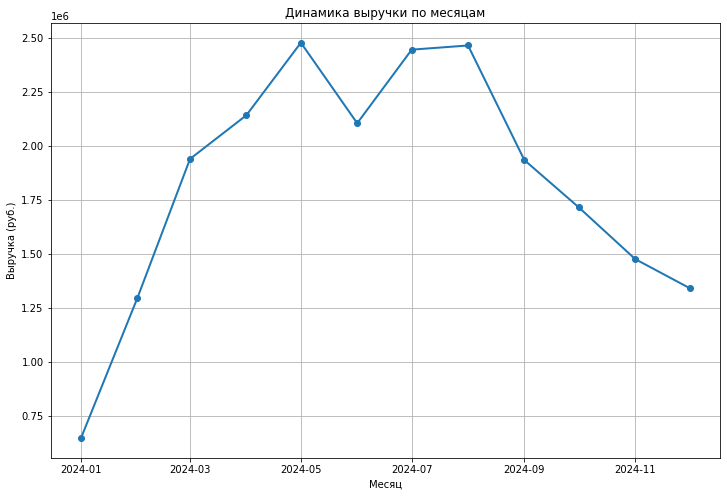

In [18]:
# Посмотрим динамику месячной выручки маркетплейса за период
revenue=orders.groupby('order_month')['revenue'].sum().reset_index()

plt.figure(figsize=(12,8))
plt.plot(revenue['order_month'],revenue['revenue'], marker='o', linewidth=2)
plt.title('Динамика выручки по месяцам')
plt.ylabel('Выручка (руб.)')
plt.xlabel('Месяц')
plt.grid(True)
plt.show()

##### Месячная выручка растёт до сентября месяца, после этого идёт активное снижение доходов маркетплейса

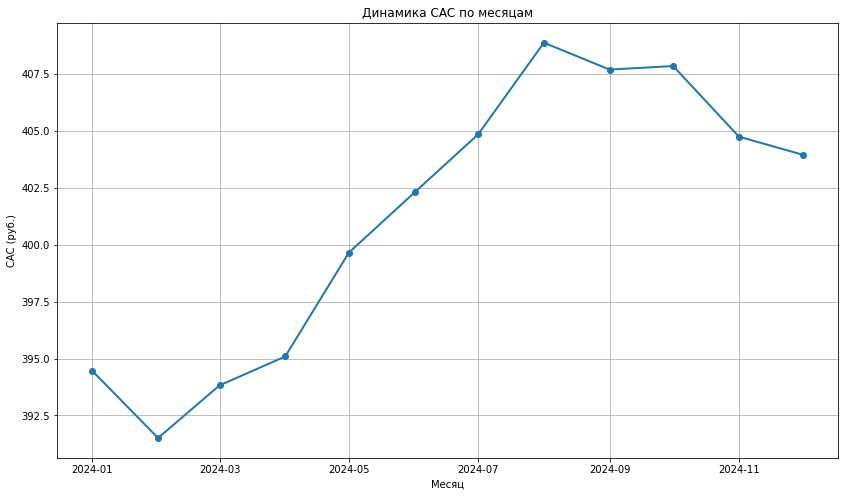

In [19]:
# Рассчитаем и визуализируем месячную динамику маркетинговых затрат
users_cohort=users.groupby('cohort_month')['user_id'].nunique().reset_index()
users_cohort=users_cohort.rename(columns={'user_id':'cohort_size'})
costs=campaign_costs.groupby('spend_month')['budget'].sum().reset_index()

total_cac=pd.merge(users_cohort,costs,left_on='cohort_month',right_on='spend_month',how='inner')
total_cac['CAC']=total_cac['budget']/total_cac['cohort_size']

plt.figure(figsize=(14,8))

plt.plot(
    total_cac['cohort_month'],
    total_cac['CAC'],
    marker='o',
    linewidth=2
)
plt.title('Динамика CAC по месяцам')
plt.xlabel('Месяц')
plt.ylabel('CAC (руб.)')
plt.grid(True)
plt.show()

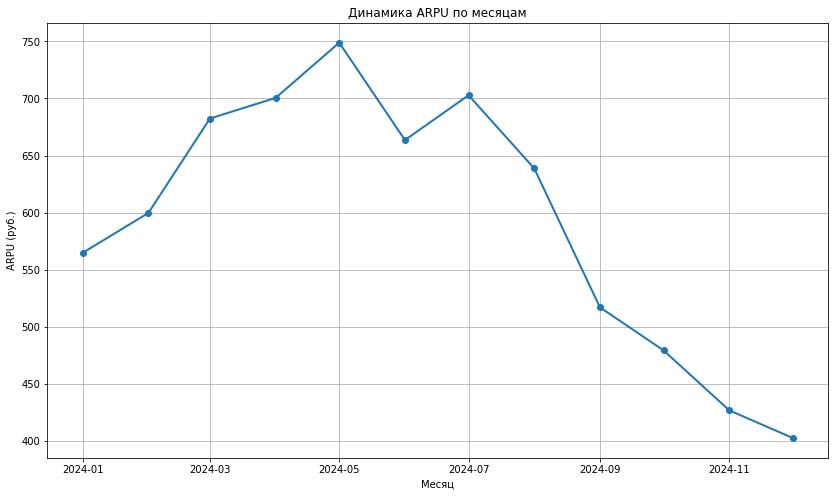

In [20]:
# Рассчитаем и визуализируем динамику ARPU
active_users=events.groupby('event_month')['user_id'].nunique().reset_index()
revenue=orders.groupby('order_month')['revenue'].sum().reset_index()

merged_arpu=pd.merge(active_users,revenue,left_on='event_month',right_on='order_month',how='inner')
merged_arpu['ARPU']=merged_arpu['revenue']/merged_arpu['user_id']

plt.figure(figsize=(14,8))

plt.plot(
    merged_arpu['event_month'],
    merged_arpu['ARPU'],
    marker='o',
    linewidth=2
)
plt.title('Динамика ARPU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('ARPU (руб.)')
plt.grid(True)
plt.show()

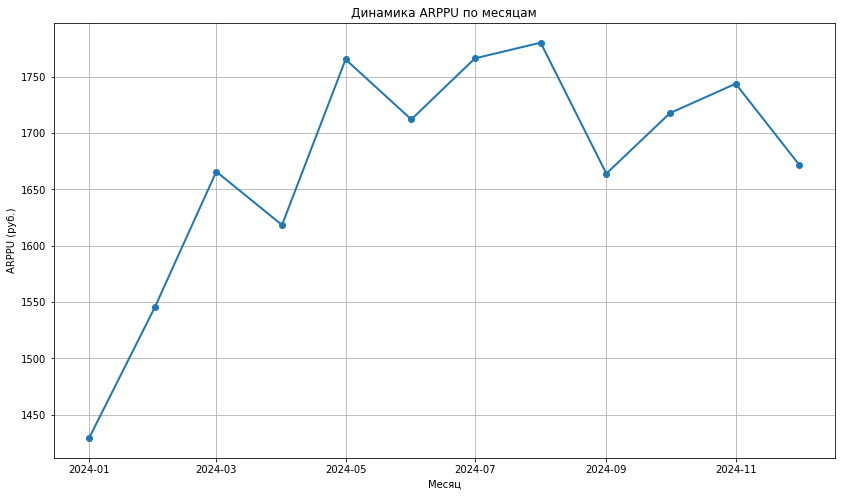

In [21]:
# Рассчитаем и визуализируем динамику ARPPU
active_paying_users=orders.groupby('order_month')['user_id'].nunique().reset_index()

merged_arppu=pd.merge(active_paying_users,revenue,on='order_month',how='inner')
merged_arppu['ARPPU']=merged_arppu['revenue']/merged_arppu['user_id']

plt.figure(figsize=(14,8))

plt.plot(
    merged_arppu['order_month'],
    merged_arppu['ARPPU'],
    marker='o',
    linewidth=2
)
plt.title('Динамика ARPPU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('ARPPU (руб.)')
plt.grid(True)
plt.show()

##### На графике с динамикой ARPU заметна сильная негативная динамика с августа месяца. Значит в продукт стало приходить много пользователей, которые не совершают заказы.

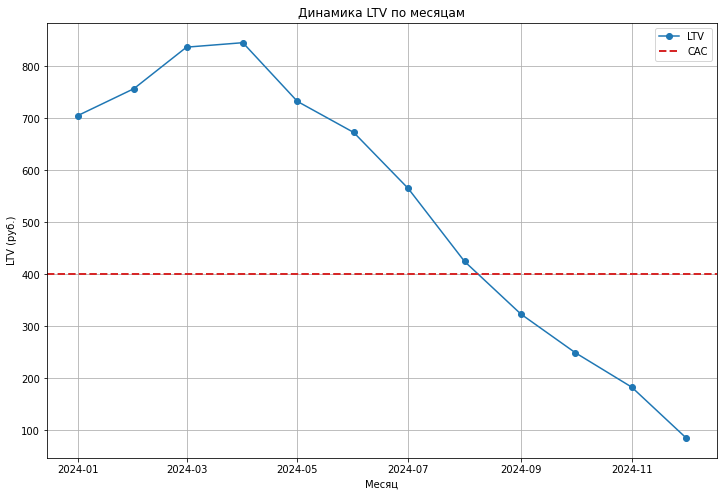

In [22]:
# Рассчитаем и визуализируем динамику LTV
orders_cohort=pd.merge(orders,users[['user_id','cohort_month']],on='user_id',how='left')
ltv = (orders_cohort.groupby(['cohort_month'], as_index=False).agg(Revenue=('revenue', 'sum')))
ltv = ltv.merge(users_cohort, on='cohort_month', how='left')
ltv['LTV'] = ltv['Revenue'] / ltv['cohort_size']


average_cac=total_cac['CAC'].mean()

plt.figure(figsize=(12,8))

plt.plot(ltv['cohort_month'],ltv['LTV'],marker='o',label='LTV') 
plt.title('Динамика LTV по месяцам')
plt.xlabel('Месяц')
plt.axhline(y=average_cac,
    linestyle='--',
    color='tab:red',
    linewidth=2,
    label='CAC'
)
plt.ylabel('LTV (руб.)')
plt.grid(True)
plt.legend()
plt.show()
plt.show()

##### У когорт с сетября месяца LTV меньше CAC

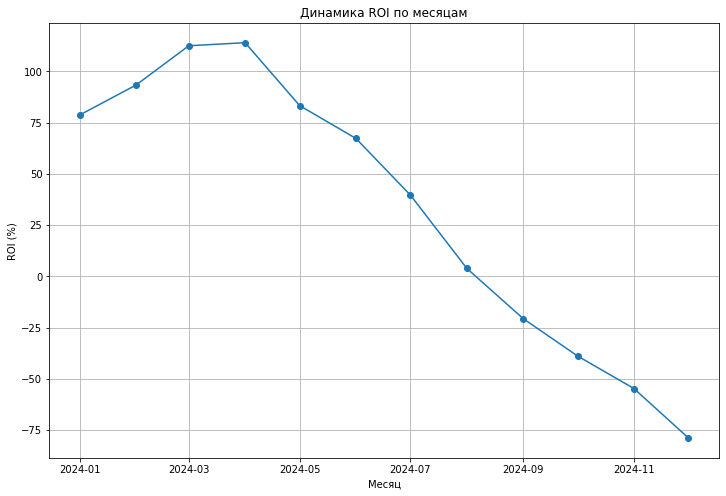

In [23]:
# Рассчитаем и визуализируем динамику ROI
roi = pd.merge(
    ltv[['cohort_month', 'LTV']],
    total_cac[['cohort_month', 'CAC']],
    on='cohort_month',
    how='outer'  
).sort_values('cohort_month').reset_index(drop=True)

roi['ROI']=(roi['LTV']-roi['CAC'])/roi['CAC']*100

plt.figure(figsize=(12,8))

plt.plot(roi['cohort_month'],roi['ROI'],marker='o') 
plt.title('Динамика ROI по месяцам')
plt.xlabel('Месяц')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.show()
plt.show()

##### ROI для когорт с сентября месяца становится отрицательным

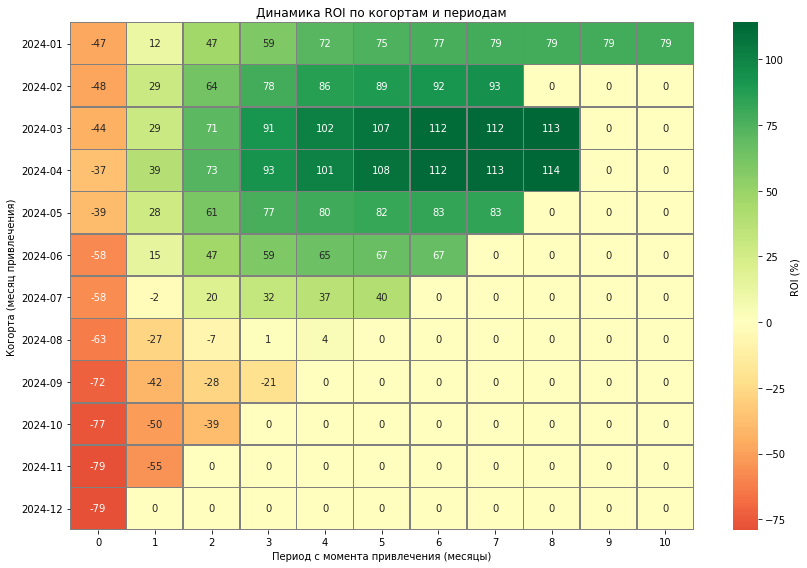

In [24]:
# Рассчитаем и визуализируем ROI для каждой когорты на тепловой карте
orders_cohort_period=orders_cohort.copy()

orders_cohort_period['N_period'] = (
    orders_cohort_period['order_month'].dt.to_period('M').astype('int64')
    - orders_cohort_period['cohort_month'].dt.to_period('M').astype('int64'))

ltv = (
    orders_cohort_period
    .groupby(['cohort_month', 'N_period'], as_index=False)
    .agg(Revenue=('revenue', 'sum'))
)

ltv = ltv.merge(users_cohort, on='cohort_month', how='left')
ltv['LTV'] = ltv['Revenue'] / ltv['cohort_size']
ltv = ltv.sort_values(['cohort_month', 'N_period'])

ltv['cum_LTV'] = (
    ltv
    .groupby('cohort_month')['LTV']
    .cumsum()
)
ltv = ltv.merge(
    total_cac[['cohort_month', 'CAC']],
    on='cohort_month',
    how='left'
)

ltv['ROI']=(ltv['cum_LTV']-ltv['CAC'])/ltv['CAC']*100

roi_pivot = ltv.pivot_table(
    index='cohort_month',      
    columns='N_period',      
    values='ROI',             
    aggfunc='mean',           
    fill_value=0            
)


roi_pivot.index = pd.to_datetime(roi_pivot.index)
roi_pivot = roi_pivot.sort_index()

roi_pivot.index = roi_pivot.index.strftime('%Y-%m')

plt.figure(figsize=(12, 8))


sns.heatmap(
    roi_pivot,
    annot=True,               
    fmt='.0f',              
    cmap='RdYlGn',           
    center=0,               
    linewidths=0.5,         
    linecolor='gray',
    cbar_kws={'label': 'ROI (%)'}  
)

plt.title('Динамика ROI по когортам и периодам')
plt.xlabel('Период с момента привлечения (месяцы)')
plt.ylabel('Когорта (месяц привлечения)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### По тепловой карте заметно сильное ухудшение окупаемости для когорт с августа месяца

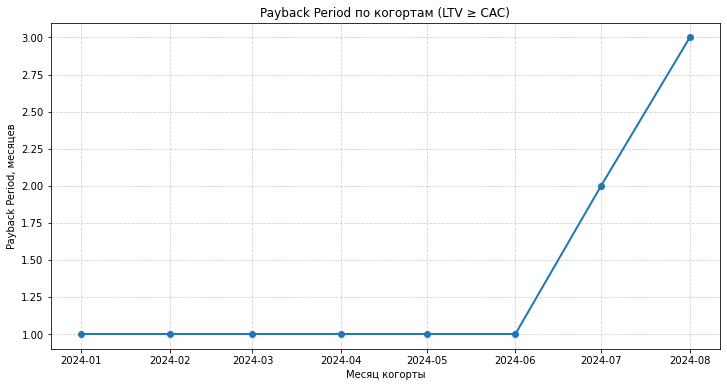

In [25]:
# Рассчитаем и визуализируем PayBack период
payback = (
    ltv[ltv['N_period'] >= 1]
    .query('cum_LTV >= CAC')
    .groupby('cohort_month', as_index=False)
    .agg(Payback_Period=('N_period', 'min'))
)
plt.figure(figsize=(12, 6))

plt.plot(
    payback['cohort_month'],
    payback['Payback_Period'],
    marker='o',
    linewidth=2
)

plt.title('Payback Period по когортам (LTV ≥ CAC)')
plt.xlabel('Месяц когорты')
plt.ylabel('Payback Period, месяцев')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

##### PayBack период для когорт с июля месяца начинает увеличиваться, а когорты с сентября месяца не окупаются за рассматриваемый период.

#### Выводы после оценки метрик монетизации и юнит-экономики: до августа месяца активно растёт выручка и вместе с ней увеличиваются затраты на маркетинг. После августа заметно сильное падение выручки при небольшом снижении затрат. Средний доход на всех активных пользователей ARPU также показывает снижение с августа месяца. LTV и ROI более поздних когорт снижаются. PayBack период для когорт с июля месяца начинает увеличиваться, а когорты с сентября месяца не окупаются за рассматриваемый период.

#### Общие выводы по этапам 2 и 3: с августа месяца в продукт стала привлекаться большая нелояльная аудитория, которая после посещения приложения не заходит в продукт и не совершает покупки, но на которую выделяется большой маркетинговый бюджет. В результате этого снижается выручка, растут издержки и увеличивается срок окупаемости маркетинговых вложений. Далее проведём сегментацию и выявим источник этого трафика.

### Поиск инсайтов и точек роста. Сегментация и формулирование гипотез.

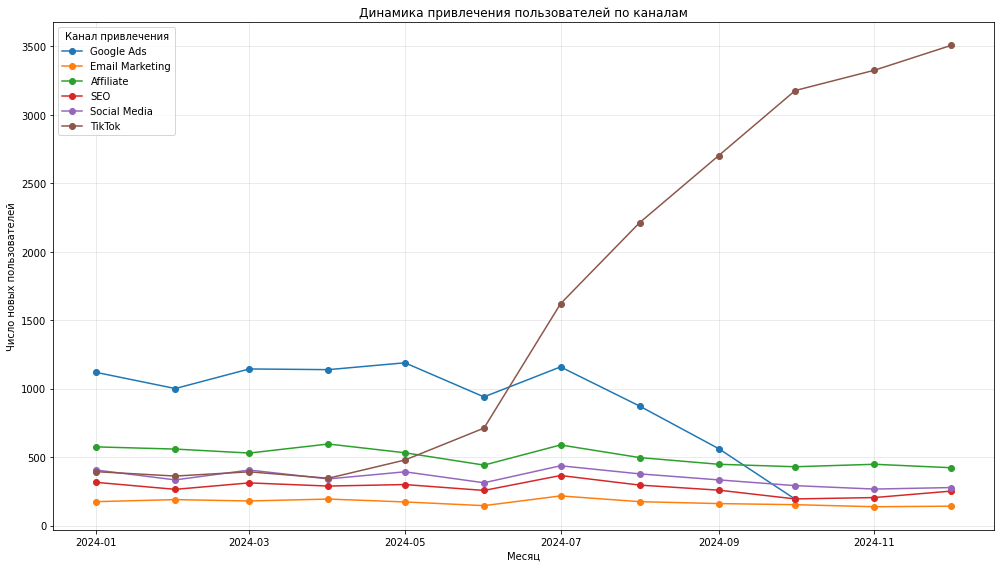

In [26]:
# Визуализируем динамику привлечения новых пользователей по различным каналам
segments=users['acq_channel'].unique()

plt.figure(figsize=(14,8))

for segment in segments:
    data=users[users['acq_channel']==segment]
    
    data=data.groupby('cohort_month')['user_id'].nunique().reset_index()
    
    plt.plot(data['cohort_month'],data['user_id'],marker='o',label=segment)
    
plt.title('Динамика привлечения пользователей по каналам') 

plt.xlabel('Месяц')
plt.ylabel('Число новых пользователей')
plt.legend(title='Канал привлечения')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

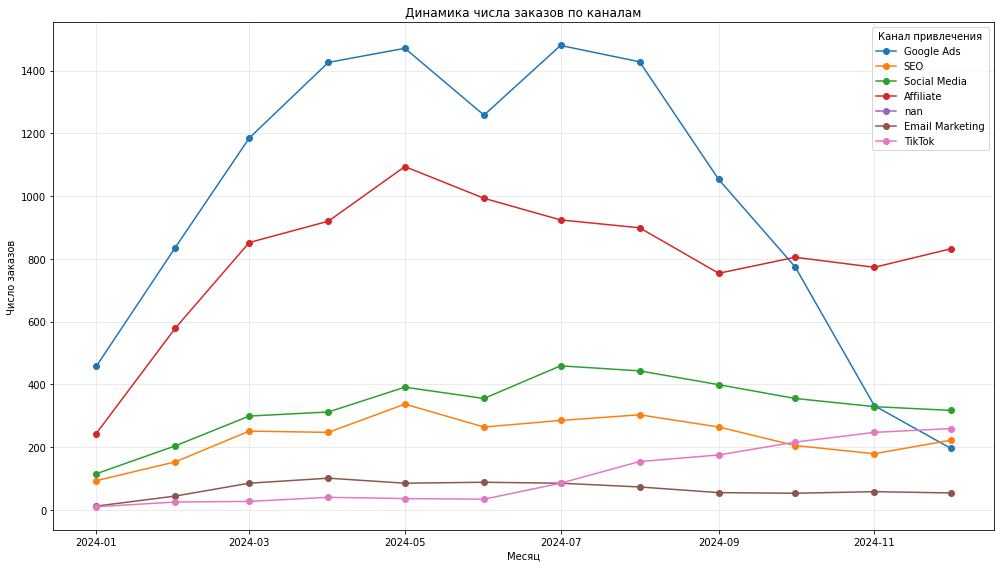

In [27]:
# Рассчитаем число заказов по каналам привлечения
orders_channel=pd.merge(orders,users[['user_id','acq_channel']],on='user_id',how='left')

segments=orders_channel['acq_channel'].unique()

plt.figure(figsize=(14,8))

for segment in segments:
    data=orders_channel[orders_channel['acq_channel']==segment]
    
    data=data.groupby('order_month')['order_id'].nunique().reset_index()
    
    plt.plot(data['order_month'],data['order_id'],marker='o',label=segment)
    
plt.title('Динамика числа заказов по каналам') 

plt.xlabel('Месяц')
plt.ylabel('Число заказов')
plt.legend(title='Канал привлечения')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

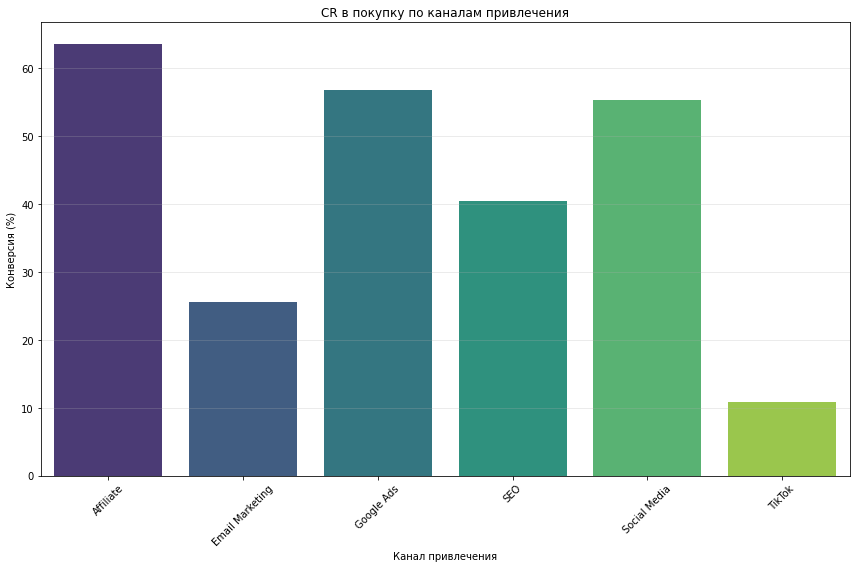

In [28]:
# Рассчитаем CR в покупку для каждого канала привлечения
df=pd.merge(all_events,users[['user_id','acq_channel']],on='user_id',how='left')

page_view = (
    df[df['event_type'] == 'page_view']
    .groupby('acq_channel')['user_id'].nunique()
    .reset_index(name='checkouts')
)

# Число уникальных пользователей с purchase по каналам
purchases = (
    df[df['event_type'] == 'purchase']
    .groupby('acq_channel')['user_id'].nunique()
    .reset_index(name='purchases')
)

# Объединяем и считаем CR
cr_df = pd.merge(page_view, purchases, on='acq_channel', how='outer').fillna(0)
cr_df['CR_percent'] = (cr_df['purchases'] / cr_df['checkouts'] * 100).round(2)

plt.figure(figsize=(12, 8))
sns.barplot(data=cr_df, x='acq_channel', y='CR_percent', palette='viridis')
plt.title('CR в покупку по каналам привлечения')
plt.ylabel('Конверсия (%)')
plt.xlabel('Канал привлечения')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


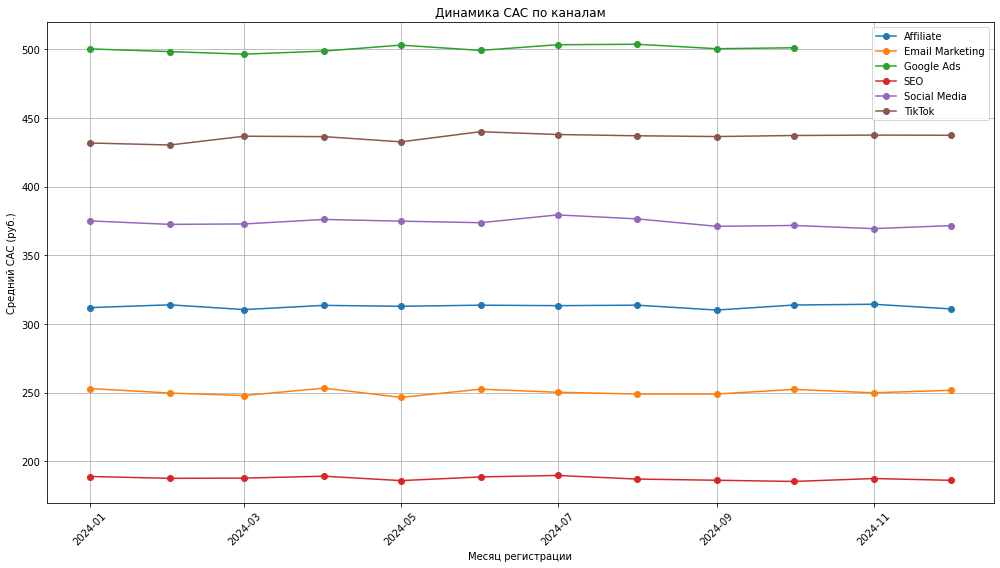

In [29]:
# Визуализируем динамику CAC по каналам
cohort_size_channel=users.groupby(['acq_channel','cohort_month'])['user_id'].nunique().reset_index()
cohort_size_channel=cohort_size_channel.rename(columns={'user_id':'cohort_size'})
channel_costs=campaign_costs.groupby(['acq_channel','spend_month'])['budget'].sum().reset_index()
channel_cac=pd.merge(cohort_size_channel,channel_costs,left_on=['acq_channel','cohort_month'],right_on=['acq_channel','spend_month'],how='inner')
channel_cac['CAC']=channel_cac['budget']/channel_cac['cohort_size']

# Построение графика
plt.figure(figsize=(14, 8))

# Цикл для построения графиков по каналам
for channel in channel_cac['acq_channel'].unique():
   df_plot = channel_cac[channel_cac['acq_channel'] == channel]
   plt.plot(df_plot['cohort_month'], df_plot['CAC'], marker='o', label=channel)

plt.xticks(rotation=45)
plt.xlabel('Месяц регистрации')
plt.ylabel('Средний CAC (руб.)')
plt.title('Динамика CAC по каналам')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
    

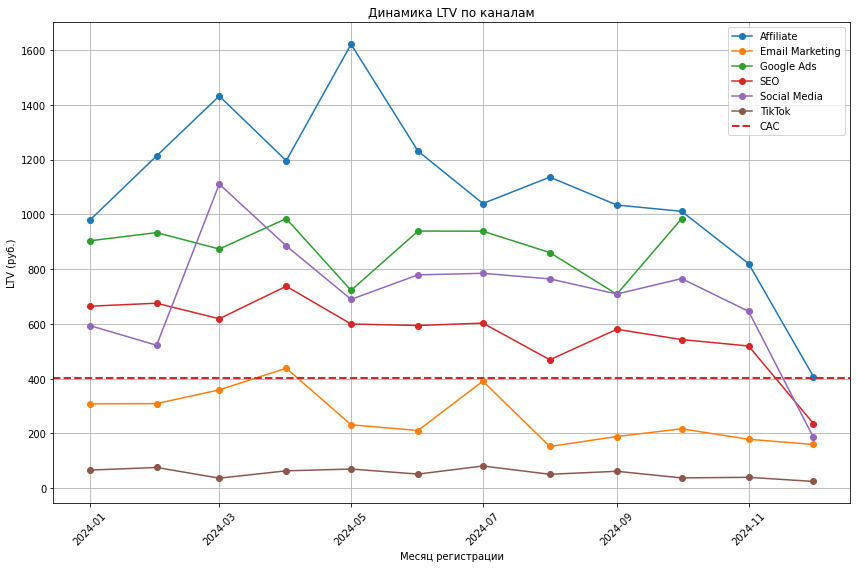

In [30]:
# Рассчитаем динамику LTV по каналам
orders_channel=pd.merge(orders,users[['user_id','cohort_month','acq_channel']],on='user_id',how='left')
ltv_channel = (orders_channel.groupby(['acq_channel','cohort_month'], as_index=False).agg(Revenue=('revenue', 'sum')))
ltv_channel = ltv_channel.merge(cohort_size_channel, on=['acq_channel','cohort_month'], how='left')
ltv_channel['LTV'] = ltv_channel['Revenue'] / ltv_channel['cohort_size']


average_cac=total_cac['CAC'].mean()

plt.figure(figsize=(12,8))

for channel in ltv_channel['acq_channel'].unique():
   df_plot = ltv_channel[ltv_channel['acq_channel'] == channel]
   plt.plot(df_plot['cohort_month'], df_plot['LTV'], marker='o', label=channel)

plt.xticks(rotation=45)
plt.xlabel('Месяц регистрации')
plt.ylabel('LTV (руб.)')
plt.title('Динамика LTV по каналам')
plt.axhline(y=average_cac,
    linestyle='--',
    color='tab:red',
    linewidth=2,
    label='CAC'
)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#####  LTV для каналов  TikTok и Email Marketing меньше CAC практически для всех когорт

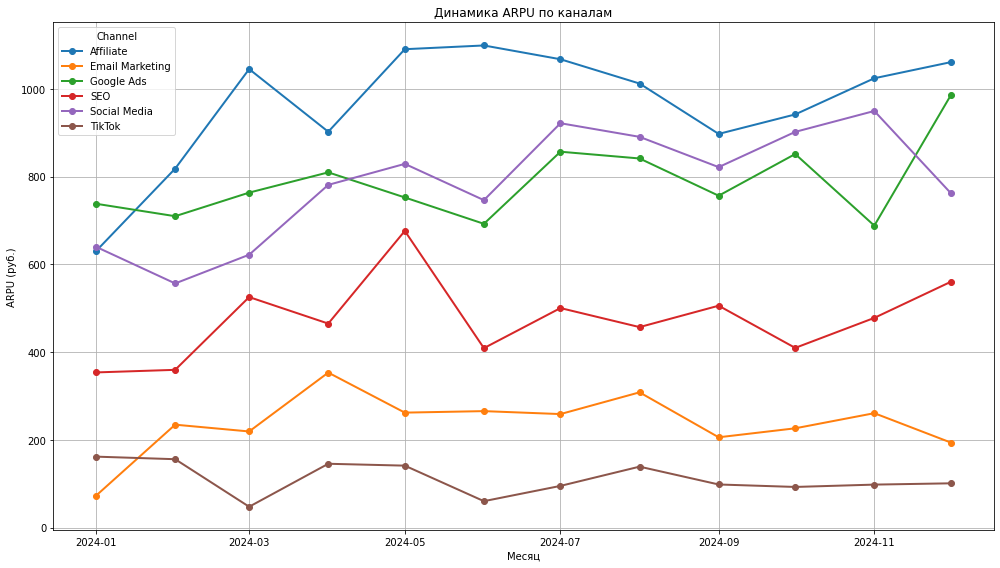

In [31]:
# Визуализируем динамику ARPU по каналам привлечения
channel_active=pd.merge(events,users[['user_id','acq_channel']],on='user_id',how='left')
channel_revenue=pd.merge(orders,users[['user_id','acq_channel']],on='user_id',how='left')
active_users=channel_active.groupby(['acq_channel','event_month'])['user_id'].nunique().reset_index()
revenue=channel_revenue.groupby(['acq_channel','order_month'])['revenue'].sum().reset_index()

merged_arpu=pd.merge(active_users,revenue,left_on=['acq_channel','event_month'],right_on=['acq_channel','order_month'],how='inner')
merged_arpu['ARPU']=merged_arpu['revenue']/merged_arpu['user_id']

channels=merged_arpu['acq_channel'].unique()
plt.figure(figsize=(14,8))

for channel in channels:
    data=merged_arpu[merged_arpu['acq_channel']==channel]
    plt.plot(
    data['event_month'],
    data['ARPU'],
    marker='o',
    linewidth=2,label=channel
    )
plt.title('Динамика ARPU по каналам')
plt.xlabel('Месяц')
plt.ylabel('ARPU (руб.)')
plt.legend(title='Channel')
plt.grid(True)
plt.tight_layout()
plt.show()


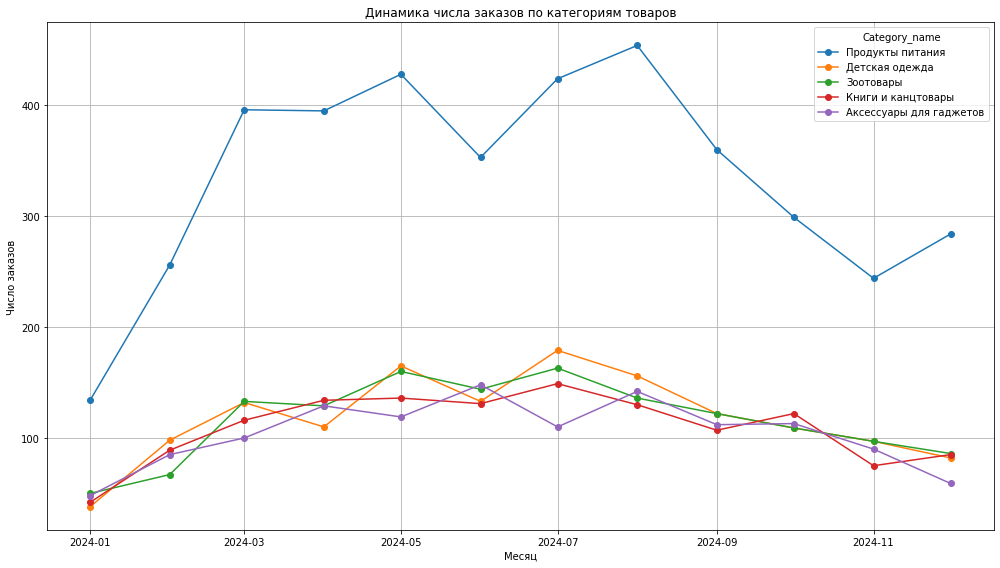

In [32]:
# Посмотрим динамику числа заказов по категориям товаров
top_categories = orders['category_name'].value_counts().head(5).index

plt.figure(figsize=(14,8))

for category in top_categories:
    data=orders[orders['category_name']==category]
    data=data.groupby('order_month')['order_id'].nunique().reset_index()
    plt.plot(data['order_month'],data['order_id'],marker='o',label=category)
    
plt.title('Динамика числа заказов по категориям товаров')
plt.xlabel('Месяц')
plt.ylabel('Число заказов')
plt.legend(title='Сategory_name')
plt.grid(True)
plt.tight_layout()
plt.show()    


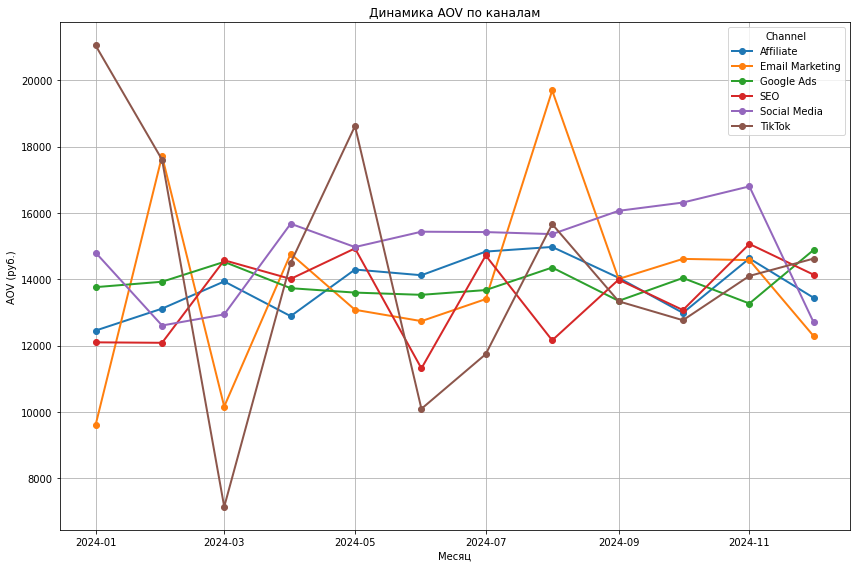

In [33]:
# Рассчитаем и визуализируем динамику AOV по каналам
aov_channel= orders_channel.groupby(['acq_channel','order_month']).agg({
    'total_price': 'sum',
    'order_id': 'nunique'
}).reset_index()
aov_channel['AOV'] = aov_channel['total_price'] / aov_channel['order_id']

plt.figure(figsize=(12,8))

for channel in aov_channel['acq_channel'].unique():
    data=aov_channel[aov_channel['acq_channel']==channel]
    plt.plot(
    data['order_month'],
    data['AOV'],
    marker='o',
    linewidth=2,label=channel
    )
plt.title('Динамика AOV по каналам')
plt.xlabel('Месяц')
plt.ylabel('AOV (руб.)')
plt.legend(title='Channel')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Выводы после проведения сегментации: после проведения оценки метрик по сегментам было выявлено, что с июля месяца через канал TikTok стало привлекаться большое число новых пользователей и это привлечение повлекло за собой сильное увеличение маркетинговых затрат на этот канал. В то же время конверсия в покупку по каналу очень низкая, также как и LTV пользователей. Этот канал привлекает в продукт большую нелояльную аудиторию, которая после посещения продукта не совершает покупки и не возвращается в приложение. Также заметно снижение числа привлекаемых пользователей через канал Google Ads. И , так как конверсия в покупку по каналу была одной из самых высоких, это привело к снижению общего числа заказов по каналу и продукту в целом, что также повлияло на выручку. Учитывая, что через канал Email Marketing привлекается меньше всего пользователей и они нелояльны, то можно рассмотреть перераспределение средств с этого канала на канал Google Ads. Аномалий по определённым категориям товаров на основе числа заказов не обнаружено.

#### Гипотезы:
1. Если предлагать пользователям канала TikTok дополнительные бонусы или проводить дополнительные акции, то они станут чаще совершать заказы и это приведёт к увеличению конверсии в покупку в продукте, так как канал привлекает большое число новых пользователей.

2. Если увеличить маркетинговые затраты на канал Google Ads и предлагать пользователям дополнительные программы лояльности, то это приведёт к увеличению числа заказов и выручки, так как канал привлекает лояльную аудиторию.

# Новые вводные 
Команда продукта рассмотрела  гипотезы и на основании этого решила влиять на конверсию при помощи финансовых стимуляций. 

## Новые данные:
```python
pa_marketplace_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_events_AB.csv')
pa_marketplace_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_orders_AB.csv')
pa_marketplace_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_users_AB.csv')
```
## Результаты сплита лежат в таблице:
```python
pa_marketplace_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_AB_split_users.csv')
```
* user_id – id клиента
* group – группа, в которую попал клиент


# Дизайн эксперимента: Бонус на первую покупку для пользователей TikTok
## 1. Контекст и цель эксперимента
- **Бизнес-контекст:** Команда продукта запускает эксперимент, направленный на повышение конверсии среди пользователей, привлечённых через канал TikTok. Для стимулирования первой покупки пользователям будет предоставлен бонус на первую покупку.
- **Цель:** Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.
- **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку
---
## 2. Формат эксперимента
- **Тип эксперимента:** Сплит-роллинг (rolling split)
- **Канал:** Только пользователи, пришедшие с TikTok
- **Группы:**
    - **Контрольная (A):** пользователи TikTok без бонуса
    - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку
- **Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации
- **Период проведения:** 3 недели (фиксировано)
---
## 3. Ключевые метрики
### Основная метрика
- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку
- *Цель:* увеличить конверсию с помощью бонуса
- *Критерий успеха:* статистически значимый рост конверсии в тестовой группе
### Вспомогательные метрики
- **ARPU** (средняя выручка на пользователя TikTok)
- **ARPPU** (средняя выручка на покупателя TikTok)
- **AOV** (средний чек TikTok)
### Барьерная метрика
- **Общая выручка от пользователей TikTok**
---
## 4. Размеры групп и запуск
- **Целевая аудитория:** только пользователи TikTok
- **Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента
- **Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи


In [34]:
# Загружаем таблицы с данными эксперимента
events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_events_AB.csv',parse_dates=['event_date', 'event_week','event_month'])
orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_orders_AB.csv',parse_dates=['order_date', 'order_week','order_month'])
users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_users_AB.csv',parse_dates=['registration_date', 'cohort_week','cohort_month'])
AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_AB_split_users.csv')

In [35]:
# Выведем общую информацию о таблицах
display(events_AB.info())
display(orders_AB.info())
display(users_AB.info())
AB_split_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831231 entries, 0 to 831230
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      831231 non-null  int64         
 1   user_id       831231 non-null  int64         
 2   event_date    831231 non-null  datetime64[ns]
 3   event_type    831231 non-null  object        
 4   os            831231 non-null  object        
 5   device        831231 non-null  object        
 6   product_name  409054 non-null  object        
 7   event_week    831231 non-null  datetime64[ns]
 8   event_month   831231 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 57.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33280 entries, 0 to 33279
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       33280 non-null  int64         
 1   user_id        33280 non-null  int64         
 2   order_date     33280 non-null  datetime64[ns]
 3   product_name   33280 non-null  object        
 4   quantity       33280 non-null  int64         
 5   unit_price     33280 non-null  float64       
 6   total_price    33280 non-null  float64       
 7   category_name  33280 non-null  object        
 8   order_week     33280 non-null  datetime64[ns]
 9   order_month    33280 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 2.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22196 entries, 0 to 22195
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            22196 non-null  int64         
 1   registration_date  22196 non-null  datetime64[ns]
 2   age                22196 non-null  int64         
 3   gender             22196 non-null  object        
 4   region             22196 non-null  object        
 5   acq_channel        22196 non-null  object        
 6   buyer_segment      22196 non-null  object        
 7   cohort_week        22196 non-null  datetime64[ns]
 8   cohort_month       22196 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 1.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2968 non-null   int64 
 1   group    2968 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.5+ KB


In [36]:
# Выведем первые строки таблиц на экран
display(events_AB.head())
display(orders_AB.head())
display(users_AB.head())
AB_split_users.head()

,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01 15:23:56,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01 15:24:01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01 15:24:10,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01 15:25:10,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01 15:25:46,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01


,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,18,2024-01-01 05:26:00,49,M,Екатеринбург,TikTok,one_time,2024-01-01,2024-01-01
1,22,2024-01-01 17:13:00,50,M,Санкт-Петербург,TikTok,one_time,2024-01-01,2024-01-01
2,26,2024-01-01 21:15:00,60,F,Москва,TikTok,rare,2024-01-01,2024-01-01
3,33,2024-01-01 14:43:00,31,M,Екатеринбург,TikTok,rare,2024-01-01,2024-01-01
4,39,2024-01-01 01:13:00,44,M,Санкт-Петербург,TikTok,rare,2024-01-01,2024-01-01


,user_id,group
0,44965,control
1,44967,control
2,44968,control
3,44969,treatment
4,44970,control


In [37]:
# Добавим группу теста в таблицу users_AB
users_AB=pd.merge(users_AB,AB_split_users,on='user_id',how='inner')
display(users_AB.info())
users_AB.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 0 to 2967
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2968 non-null   int64         
 1   registration_date  2968 non-null   datetime64[ns]
 2   age                2968 non-null   int64         
 3   gender             2968 non-null   object        
 4   region             2968 non-null   object        
 5   acq_channel        2968 non-null   object        
 6   buyer_segment      2968 non-null   object        
 7   cohort_week        2968 non-null   datetime64[ns]
 8   cohort_month       2968 non-null   datetime64[ns]
 9   group              2968 non-null   object        
dtypes: datetime64[ns](3), int64(2), object(5)
memory usage: 255.1+ KB


None

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month,group
0,44965,2025-01-01 18:10:00,66,M,Новосибирск,TikTok,one_time,2024-12-30,2025-01-01,control
1,44967,2025-01-01 11:29:00,70,M,Московская область,TikTok,rare,2024-12-30,2025-01-01,control
2,44968,2025-01-01 13:05:00,68,F,Нижний Новгород,TikTok,regular,2024-12-30,2025-01-01,control
3,44969,2025-01-01 00:23:00,24,F,Краснодар,TikTok,medium,2024-12-30,2025-01-01,treatment
4,44970,2025-01-01 06:33:00,50,M,Санкт-Петербург,TikTok,regular,2024-12-30,2025-01-01,control


In [38]:
f' Даты регистрации пользователей с {users_AB["registration_date"].min()} по {users_AB["registration_date"].max()}'

' Даты регистрации пользователей с 2025-01-01 00:05:00 по 2025-01-26 23:41:00'

In [39]:
# Отфильтруем по дате проведения эксперимента
start_date=pd.to_datetime('2025-01-01')
end_date=pd.to_datetime('2025-01-21')

users_AB=users_AB[(users_AB['registration_date']>=start_date) & (users_AB['registration_date']<=end_date)]

In [40]:
# Проверяем канал привлечения
users_AB['acq_channel'].unique()

array(['TikTok'], dtype=object)

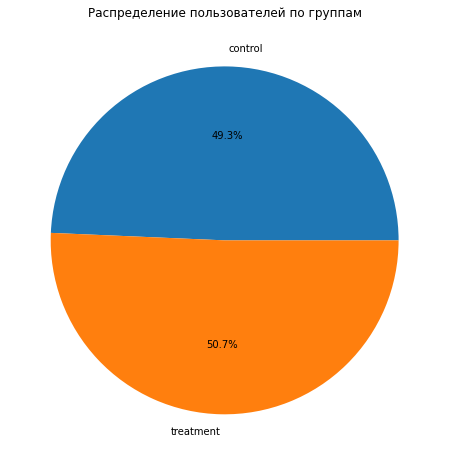

In [41]:
# Проверяем распределение пользователей по группам
groups_count=users_AB.groupby('group')['user_id'].nunique().reset_index()


plt.figure(figsize=(12,8))

plt.pie(groups_count['user_id'],labels=groups_count['group'],autopct='%1.1f%%')

plt.title("Распределение пользователей по группам")

plt.show()

##### В контрольной группе пользователей меньше, чем в тестовой. Но разница не существенна.

In [42]:
# Проверим данные на дубликаты
users_AB.duplicated().sum()

0

##### Дубликатов нет

In [43]:
# Проверяем пересечение пользователей по группам
control_group=users_AB[users_AB['group']=='control']['user_id'].unique()
test_group=users_AB[users_AB['group']=='treatment']['user_id'].unique()
intersection=len(set(control_group) & set(test_group))
print(f'Число пользователей контрольной группы:{len(set(control_group))}, тестовой группы: {len(set(test_group))} ')
f'Число пересечений между группами равно: {intersection}'

Число пользователей контрольной группы:1151, тестовой группы: 1183 


'Число пересечений между группами равно: 0'

##### Пересечений между групп нет

In [44]:
# Отфильтруем таблицу с заказами по датам эксперимента и добавим информацию о тестовых группах
orders_AB=orders_AB[(orders_AB['order_date']>=start_date) & (orders_AB['order_date']<=end_date)]
orders_AB=orders_AB.merge(users_AB[['user_id','group']],on='user_id',how='left')
orders_AB['revenue']=orders_AB['total_price']*0.05
orders_AB.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month,group,revenue
0,22287,20116,2025-01-01 00:31:20,Куртка детская,1,2156.91,2156.91,Детская одежда,2024-12-30,2025-01-01,NaN,107.8455
1,36187,43035,2025-01-01 01:09:29,Свечи зажигания,3,18105.64,54316.92,Автотовары,2024-12-30,2025-01-01,NaN,2715.8460
2,36188,43035,2025-01-01 01:09:29,Коврик туристический,3,9650.30,28950.90,Товары для туризма,2024-12-30,2025-01-01,NaN,1447.5450
3,36189,43035,2025-01-01 01:09:29,Горелка газовая,1,10505.23,10505.23,Товары для туризма,2024-12-30,2025-01-01,NaN,525.2615
4,34418,39490,2025-01-01 01:51:01,Ваза керамическая,2,1126.95,2253.90,Декор и освещение,2024-12-30,2025-01-01,NaN,112.6950


In [45]:
# Отфильтруем таблицу с событиями по датам эксперимента и добавим информацию о тестовых группах
events_AB=events_AB[(events_AB['event_date']>=start_date) & (events_AB['event_date']<=end_date)]
events_AB=events_AB.merge(users_AB[['user_id','group']],on='user_id',how='left')
events_AB.head()

,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month,group
0,758397,36525,2025-01-01 00:02:41,checkout_complete,iOS,desktop,NaN,2024-12-30,2025-01-01,NaN
1,758459,36525,2025-01-01 00:03:45,checkout_complete,iOS,desktop,NaN,2024-12-30,2025-01-01,NaN
2,758473,36525,2025-01-01 00:04:42,checkout_complete,iOS,desktop,NaN,2024-12-30,2025-01-01,NaN
3,758474,36525,2025-01-01 00:05:28,user_login,iOS,desktop,NaN,2024-12-30,2025-01-01,NaN
4,836801,44219,2025-01-01 00:05:47,page_view,iOS,tablet,NaN,2024-12-30,2025-01-01,NaN


In [46]:
# Проверим дубликаты по таблицам orders и events
display(f' Число дубликатов в таблице orders_AB равно: {orders_AB.duplicated().sum()} ')
f' Число дубликатов в таблице events_AB равно: {events_AB.duplicated().sum()} '

' Число дубликатов в таблице orders_AB равно: 0 '

' Число дубликатов в таблице events_AB равно: 0 '

##### Дубликатов в таблицах с заказами и событиями нет

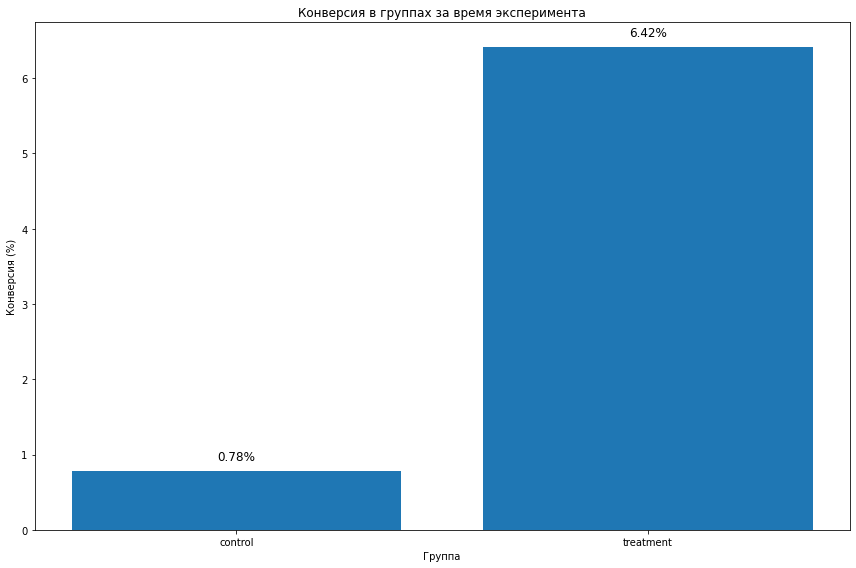

In [47]:
# Рассчитаем ключевую метрику и визуализируем
groups_reg=users_AB.groupby('group')['user_id'].nunique().reset_index()
groups_reg=groups_reg.rename(columns={'user_id':'reg_count'})

groups_purchase=orders_AB.groupby('group')['user_id'].nunique().reset_index()
groups_purchase=groups_purchase.rename(columns={'user_id':'purchase_count'})
groups_conversion=pd.merge(groups_reg,groups_purchase,on='group',how='inner')
groups_conversion['conversion']=round(groups_conversion['purchase_count']/groups_conversion['reg_count']*100,2)

plt.figure(figsize=(12,8))

bars=plt.bar(groups_conversion['group'],groups_conversion['conversion'])

for bar, conversion in zip(bars, groups_conversion['conversion']):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.1,                 
        f'{conversion:.2f}%',                   
        ha='center',                              
        va='bottom',                            
        fontsize=12,                         
        color='black'                           
)
    
plt.title('Конверсия в группах за время эксперимента')
plt.xlabel('Группа')
plt.ylabel('Конверсия (%)')
plt.tight_layout()
plt.show()

In [48]:
# Проведём Z-тест пропорций для определения статистической значимости изменений
alpha=0.05

control_reg = groups_conversion.loc[groups_conversion['group'] == 'control', 'reg_count'].values[0]
control_purchase = groups_conversion.loc[groups_conversion['group'] == 'control', 'purchase_count'].values[0]
test_reg = groups_conversion.loc[groups_conversion['group'] == 'treatment', 'reg_count'].values[0]
test_purchase = groups_conversion.loc[groups_conversion['group'] == 'treatment', 'purchase_count'].values[0]

#Проводим z-тест пропорций
successes = [control_purchase,test_purchase]
nobs = [control_reg, test_reg]
zstat, pval = proportions_ztest(count=successes, nobs=nobs, alternative='smaller')

if pval<=alpha:
    display(f' Значение p_value меньше уровня стат.значимости alpha. Различия статистически значимы')
else:
    display(f' Значение p_value больше уровня стат.значимости alpha. Различия не имеют статистической значимости')

' Значение p_value меньше уровня стат.значимости alpha. Различия статистически значимы'

##### По результатам Z-теста определено, что конверсии в тестовой группе выше и различия между группами статистически значимы.

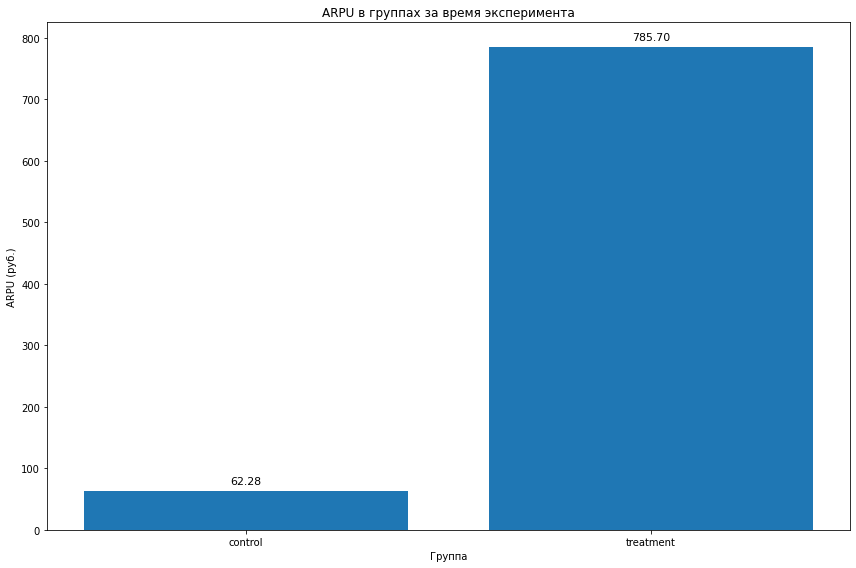

In [49]:
# Рассчитаем вспомогательную метрику ARPU для групп теста
active_users=events_AB.groupby('group')['user_id'].nunique().reset_index()
revenue=orders_AB.groupby('group')['revenue'].sum().reset_index()

arpu=pd.merge(active_users,revenue,on='group',how='inner')

arpu['ARPU']=arpu['revenue']/arpu['user_id']

plt.figure(figsize=(12,8))

bars=plt.bar(arpu['group'],arpu['ARPU'])

for bar, arpu_value in zip(bars, arpu['ARPU']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,     
        bar.get_height() + max(arpu['ARPU']) * 0.01,  
        f'{arpu_value:,.2f}',                   
        ha='center',                             
        va='bottom',                           
        fontsize=11,                         
        color='black'                                            
)

plt.title('ARPU в группах за время эксперимента')
plt.xlabel('Группа')
plt.ylabel('ARPU (руб.)')
plt.tight_layout()
plt.show()

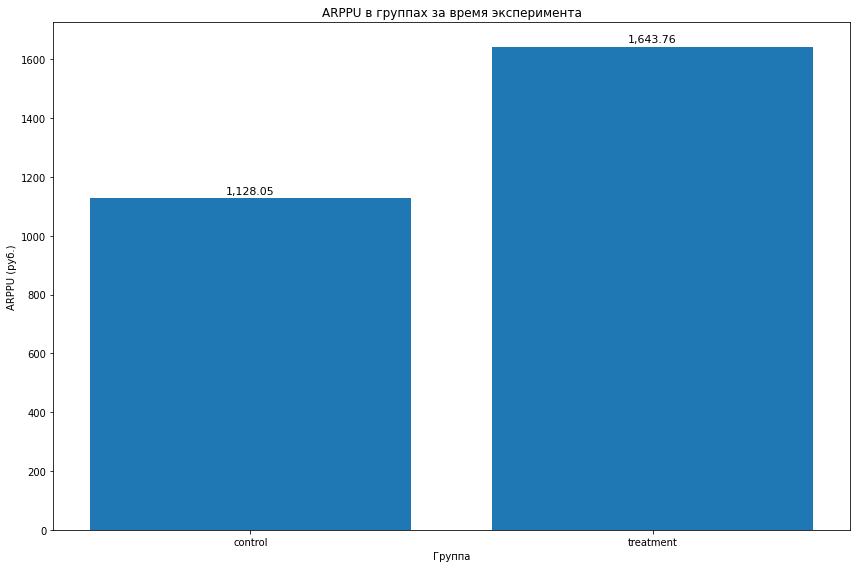

In [50]:
# Рассчитаем вспомогательную метрику ARPPU для групп теста
paying_users=orders_AB.groupby('group')['user_id'].nunique().reset_index()

arppu=pd.merge(paying_users,revenue,on='group',how='inner')

arppu['ARPPU']=arppu['revenue']/arppu['user_id']

plt.figure(figsize=(12,8))

bars=plt.bar(arppu['group'],arppu['ARPPU'])

for bar, arppu_value in zip(bars, arppu['ARPPU']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,     
        bar.get_height() + max(arpu['ARPU']) * 0.01,  
        f'{arppu_value:,.2f}',                   
        ha='center',                             
        va='bottom',                           
        fontsize=11,                         
        color='black'                                            
)

plt.title('ARPPU в группах за время эксперимента')
plt.xlabel('Группа')
plt.ylabel('ARPPU (руб.)')
plt.tight_layout()
plt.show()

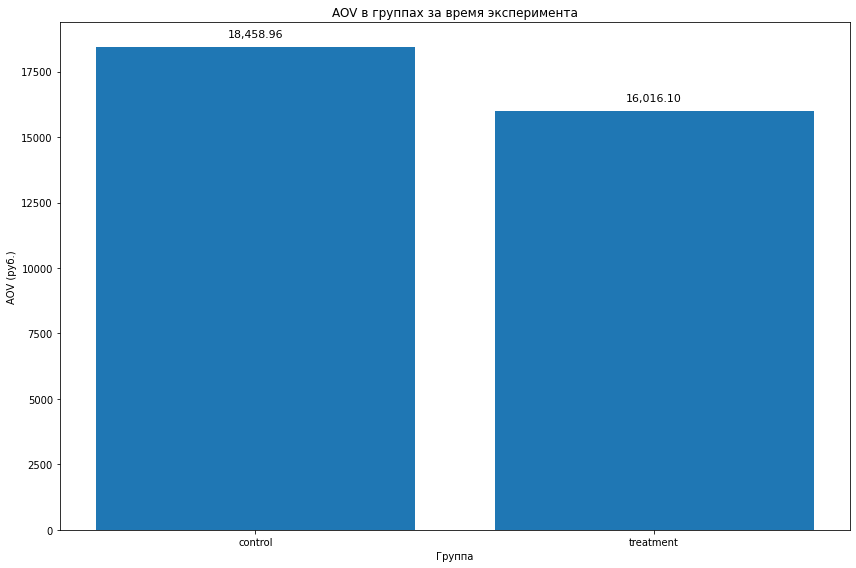

In [51]:
# Рассчитаем вспомогательную метрику AOV по группам эксперимента
aov=orders_AB.groupby('group').agg({
    'total_price': 'sum',
    'order_id': 'nunique'
}).reset_index()

aov['AOV']=aov['total_price']/aov['order_id']

plt.figure(figsize=(12,8))

bars=plt.bar(aov['group'],aov['AOV'])

for bar, aov_value in zip(bars, aov['AOV']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,           
        bar.get_height() + max(aov['AOV']) * 0.015,  
        f'{aov_value:,.2f}',                         
        ha='center',                              
        va='bottom',                             
        fontsize=11,
        color='black'
)

plt.title('AOV в группах за время эксперимента')
plt.xlabel('Группа')
plt.ylabel('AOV (руб.)')
plt.tight_layout()
plt.show()

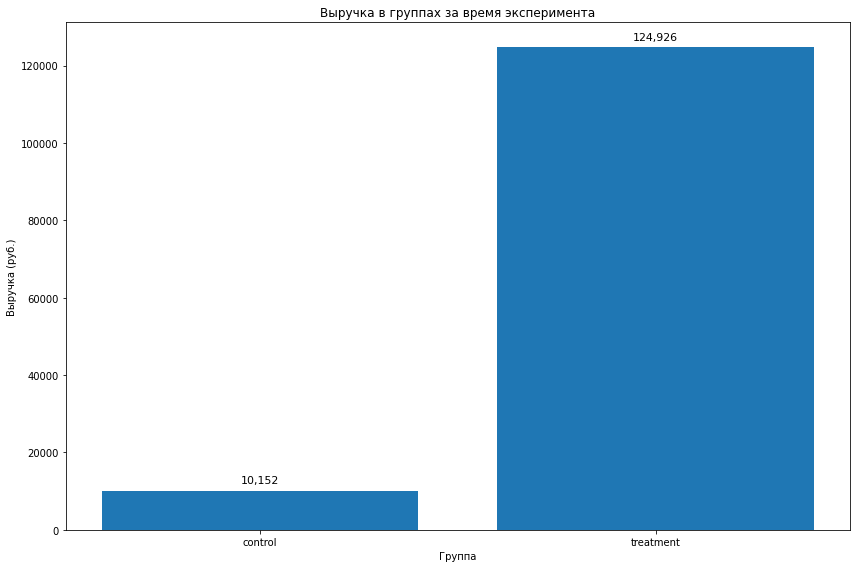

In [52]:
# Рассчитаем барьерную метрику  по группам эксперимента
plt.figure(figsize=(12,8))

bars=plt.bar(revenue['group'],revenue['revenue'])

for bar, rev_value in zip(bars, revenue['revenue']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,           
        bar.get_height() + max(revenue['revenue']) * 0.01,  
        f'{rev_value:,.0f}',                       
        ha='center',                              
        va='bottom',                            
        fontsize=11,
        color='black'
)

plt.title('Выручка в группах за время эксперимента')
plt.xlabel('Группа')
plt.ylabel('Выручка (руб.)')
plt.tight_layout()
plt.show()

### По итогам проведённого эксперимента было выявлено следующее:
1. Ключевая метрика (конверсия в покупку) показала статистически значимый рост в тестовой группе. После получения бонуса на первую покупку пользователи стали чаще совершать заказы после регистрации. Гипотеза подтвердилась
2. Барьерная метрика в тестовой группе также показала существенный рост,значит  бонус экономически целесообразен.
3. Вспомогательные метрики ARPU,ARPPU улучшились в тестовой группе,значит бонус стимулирует дополнительные траты.
4. Ухудшилась вспомогательная метрика AOV, что может указывать на то,что возможно пользователи тратят только сумму бонуса. 
### По итогам эксперимента рекомендуется масштабировать бонус на всех новых пользователей TikTok,при этом отслеживать динамику LTV, так как из-за короткого срока эксперимента нельзя оценить долгосрочное влияние на метрику.